# TITANIC SHIPWRECK : Machine Learning from Disaster

 ## Problem Statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

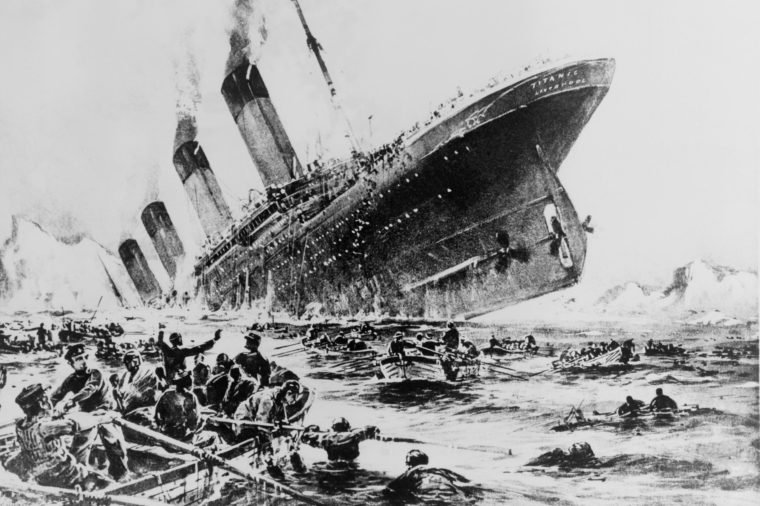

In [1]:
from IPython.display import Image 
Image(r'C:\Users\hp1\Desktop\titanic.jpg')

### Import Libraries

In [1]:
# Linear Algebra
import numpy as np
# Data Processing
import pandas as pd
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# graphs within particular jupyter notebook
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [2]:
titanic=pd.read_csv(r'E:\BUSINESS ANALYST\STUDY MATERIAL FROM IMS PORTAL\PROJECT A\train.csv')
titanic
#'r' before the path string is used to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Top 5 Rows

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Bottom 5 Rows

In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Data Dictionary
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: M/F
- Age: Age in years
- Sibsp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passanger Fare
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Total rows and columns

In [6]:
titanic.shape

(891, 12)

We can see that there are 891 rows and 12 columns in our training dataset.

### Size (Rows x Columns)

In [7]:
titanic.size

10692

### Basic Statistical Details

5 point summary (Min, Max, Q1 (25%), Q2,(Median or 50%), Q3 (75%)), Count, Mean(Average), Standard Deviation of continuous & discrete variable

Q1 = 1st Quartile or 25th Percentile

Q2 = 2nd Quartile or 50th Percentile or Median - half of the data below this point and rest half above this point

Q3 = 3rd Quartile or 75th Percentile

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the titanic-set survived. We can also see that the passenger ages range from 0.4 to 80.

In [9]:
titanic.describe(include='all') 
# Include all shows Unique, Top & Frequency of string data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sobey, Mr. Samuel James Hayden",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Information About the Data

In [10]:
titanic.info() 
# Data information like - Rows(Range Index), Columns, Columns Name, Null Values, Data Type & memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has 891 rows and 12 columns (11 features + the target variable (survived)). 2 of the features are floats, 5 are integers and 5 are objects. It is also clear that the Titanic dataset have missing values in Age, Cabin & Embarked columns

In [11]:
titanic.Sex.unique()
# Unique is used to identify the different kinds of values inside a column

array(['male', 'female'], dtype=object)

2 values are in Sex column - male & female

In [12]:
titanic.Cabin.nunique()
# nuique is used to identify total nos of unique values

147

Total 147 unique values are in cabin column, as we can see first letter is alphabet & rest all are numeric 

In [13]:
titanic['Cabin']=titanic['Cabin'].str[:1]
# To seperate the first alphabet from the cabin column

## Exploratory Data Analysis 

1.EDA – plays a critical role in understanding the what, why, and how of the problem statement. It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.

2.Exploratory Data Analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

3.Let’s understand different operations where EDA comes into play:

     a. First and foremost, EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset

     b. EDA provides relevant insights which help analysts to make key business decisions

     c. The EDA step provides a platform to run all thought experiments and ultimately guides us towards making a critical decision.


There are 7 steps involved to clean and prepare the data for building predictive model

1.Variable Identification

2.Univariate Analysis

3.Bivariate Analysis

4.Missing values treatment

5.Outlier treatment

6.Variable transformation

7.Variable creation


## Step 1: Variable Identification

1.Understand the variables and the type of data for each variable

2.We need to identify predictor variables, target variable, data type of variables and category of variables


### Dependent & Independent Variables

##### DEPENDENT VARIABLE OR TARGET VARIABLE (VARIABLE THAT IS BEING PREDICT)-

* Survived

##### INDEPENDENT VARIABLE OR PREDICTOR VARIABLE (THESE ARE USED TO PREDICT THE DEPENDENT VARIABLE)-
1. Pclass
2. Sex
3. Age
4. SibSp
5. Parch
6. Fare
7. Cabin
8. Embarked

The thing that is able to vary is called varibale and it's opposite to constant.

PassengerId, Name & Ticket are not relevent to survival.

### Data Types-
    
Object(Numeric + String (SEQUENCE OF CHARACTERS))-
1. Name
2. Sex
3. Ticket
4. Cabin 
5. Embarked
    
Numeric(IT CONTAINS NUMERICAL VALUES)-Integers(NO Decimals)+Float(Have Decimals):
1. PassengerId
2. Pclass 
3. Age
4. SibSp
5. Parch
6. Fare

### Variables Categories:

Categorical Variable(It classifies categories):- Pclass, Sex, Embarked, Cabin, SibSp, Parch

Continuous Variable(Reply of How Much):- Age, Fare

Discrete Variable(Reply of How many):- 

## Step 2: Univariate Analysis

1. Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so we analyze one variable at one time

2. It doesn’t deal with causes or relationships among variables but mostly to describe and summarize and find patterns in the data

3. Used to highlight missing and outlier values

4. Method to perform univariate analysis depends on whether the variable type is categorical or continuous


### Continuous Variables

These measures(below) help in determining the central value and also the dispersion of continuous variables


#### CENTRAL TENDENCY
CT IS CENTRAL VALUE FOR A DISTRIBUTION

MEAN - AVERAGE VALUE 

MEDIAN - MIDDLE VALUE 

MODE - MOST FREQUENT VALUE 

MIN - MINIMUM VALUE

MAX - MAXIMUM VALUE

#### MEASURE OF DISPERSION
DISPERSION IS THE EXTEND TO WHICH A DISTRIBUTION IS STRETCHED OR SQUEEZED.

RANGE - LARGEST VALUE-SMALLEST VALUE

QUARTILE - SPLITS THE DATA INTO QUARTERS

PERCENTILE - SPLITS THE DATA INTO PERCENTAGES

IQR - INTER QUARTILE RANGE (Q3-Q1)

VARIANCE - IT MEASURES HOW FAR EACH NUMBER IN THE SET IS FROM THE MEAN.

STANDARD DEVIATION -JUST THE SQUARE ROOT OF VARIANCE.

#### MEASURE OF SHAPES
IT DESCRIBES THE DISTRIBUTION OR PATTERN OF THE DATA IN A SET.

SKEWNESS - MEASURE OF SYMMETRY

KURTOSIS - SHARPNESS OF THE PEAK

#### VISUALIZATION METHOD
WE CAN VIEW GRAPHICAL OUTPUT OF VARIABLES BY VISUALIZATION METHOD.

BOX-PLOT

HISTOGRAM
* We can also use dist plot, it's a kind of histogram.

### Continuous Variables - UNIVARIATE ANALYSIS

We can view graphical output through Box Plot and Histogram for Continuous variable

#### BOX PLOT, HISTOGRAM, DIST PLOT & SUB PLOT FOR CONTINUOUS VARIABLES-
1.Age

2.Fare


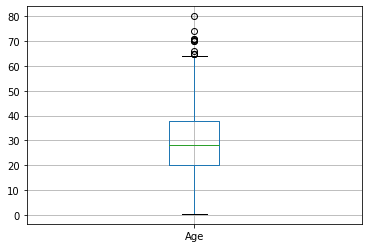

In [14]:
titanic.boxplot(column=['Age'])

Text(0.5, 1.0, 'Boxplot')

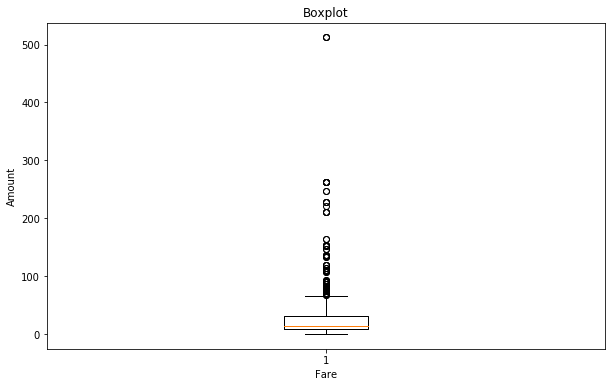

In [15]:
plt.figure(figsize=(10,6))
plt.boxplot(x='Fare',data=titanic)
plt.xlabel('Fare')
plt.ylabel('Amount')
plt.title('Boxplot')

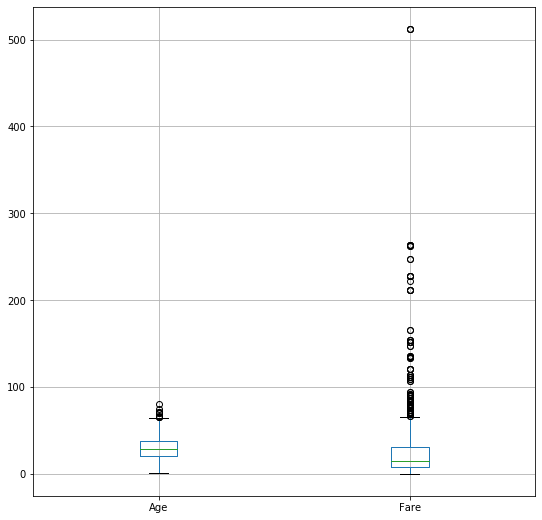

In [16]:
titanic.boxplot(column=['Age','Fare'],figsize=(9,9))

It can be seen that Box Plots for Age & Fare have outlier, we can see one or more data point beyond the whiskers of the box plots, which can be denoted as outliers. Hence, this visual representation can be used to detect outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFB63C96C8>]],
      dtype=object)

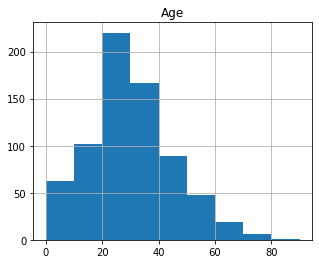

In [17]:
titanic.hist(column=['Age'],bins=[0,10,20,30,40,50,60,70,80,90],figsize=(5,4))

Text(0.5, 1.0, 'Histogram')

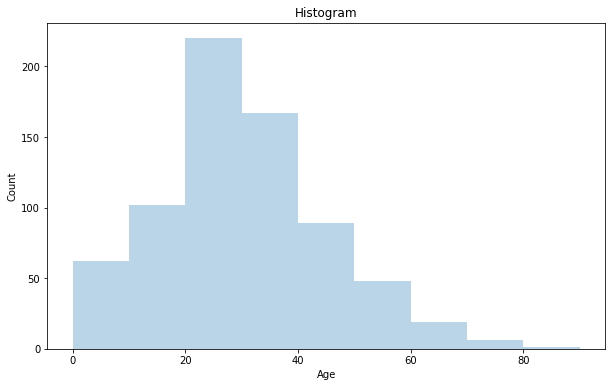

In [18]:
plt.figure(figsize=(10,6))
plt.hist(x='Age',bins=[0,10,20,30,40,50,60,70,80,90],data=titanic,alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

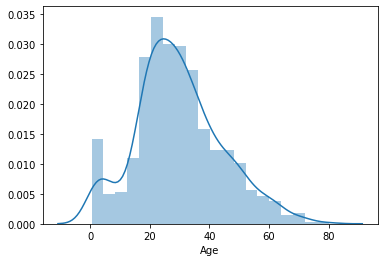

In [19]:
sns.distplot(titanic['Age'])

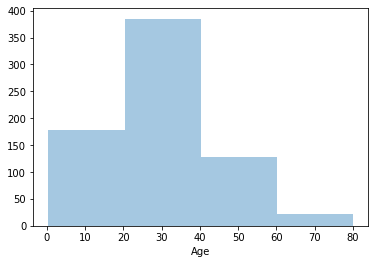

In [20]:
sns.distplot(titanic['Age'],bins=4,kde=False)
# KDE- Whether to plot a gaussian kernel density estimate
# BINS- No. of bins that we want to create 

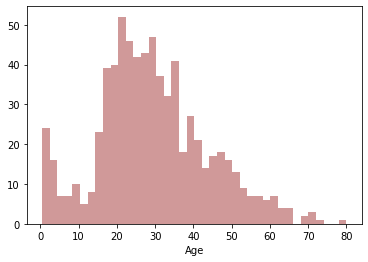

In [21]:
sns.distplot(titanic['Age'].dropna(),bins=40,kde=False,color='darkred')
# Distplot of Age after removing null values

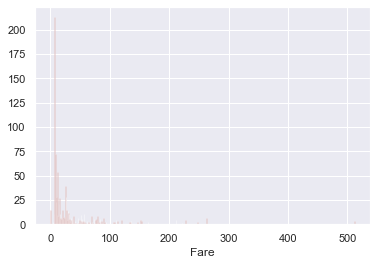

In [13]:
sns.distplot(titanic['Fare'],bins=512,kde=False,color='darkred')
# Distplot of Age after removing null values

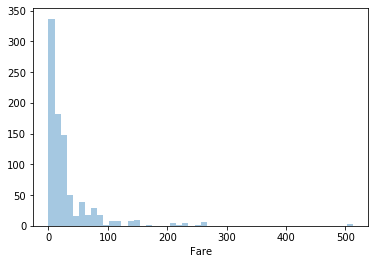

In [22]:
sns.distplot(titanic['Fare'],kde=False)
# KDE- Whether to plot a gaussian kernel density estimate
# BINS- No. of bins that we want to create 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFB6931DC8>]],
      dtype=object)

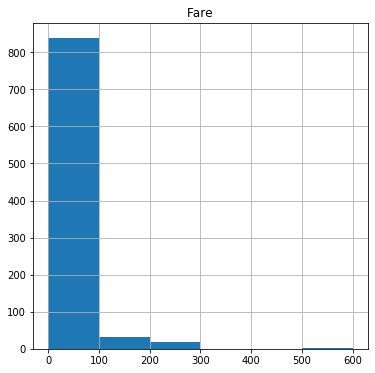

In [23]:
titanic.hist(column='Fare',bins=[0,100,200,300,400,500,600],figsize=(6,6))

Text(0, 0.5, 'Freq')

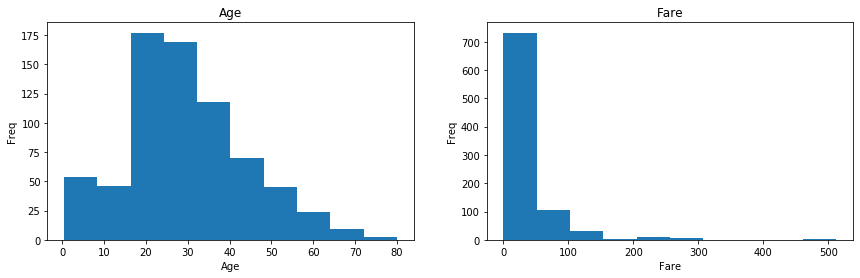

In [24]:
plt.subplot(1,2,1)
plt.hist(x='Age',data=titanic)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Freq')


plt.subplots_adjust(right=1.99)

plt.subplot(1,2,2)
plt.hist(titanic['Fare'])
plt.title('Fare')
plt.xlabel('Fare')
plt.ylabel('Freq')

### Categorical Variables - UNIVARIATE ANALYSIS

Frequency table is used to understand the distribution of each category under a variable, we can produce count and count% against each category, Count plot or Bar plot could be used to visualize the Frequency Table.


#### BAR PLOT & COUNT PLOT FOR CATEGORICAL VARIABLES-
1. Pclass
2. Sex
3. Embarked
4. Cabin
5. SibSp
6. Parch


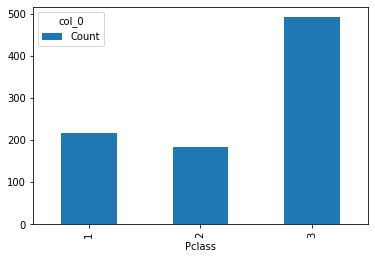

In [25]:
pd.crosstab(titanic['Pclass'],columns='Count').plot(kind='bar')

As we can see the Barplot above, we observe that our data has more number in class 3.

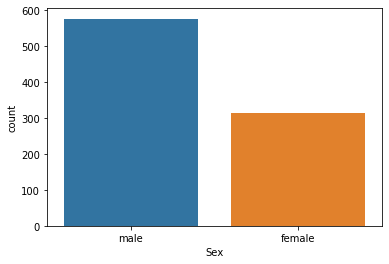

In [26]:
sns.countplot(titanic['Sex'])

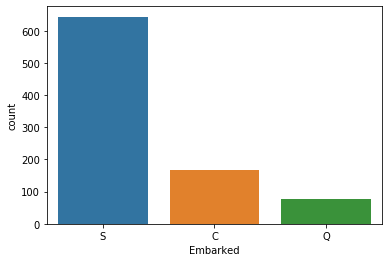

In [27]:
sns.countplot(x='Embarked',data=titanic)

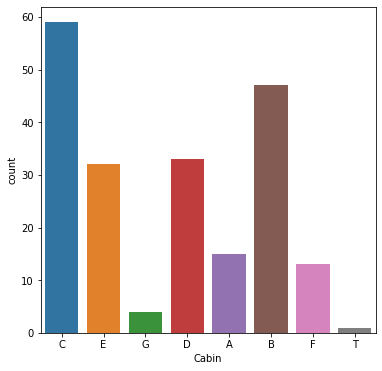

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='Cabin',data=titanic)

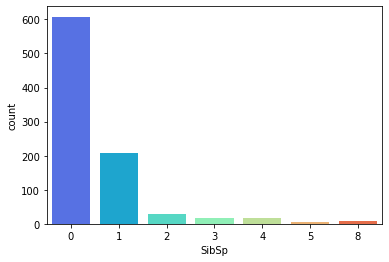

In [29]:
sns.countplot(x='SibSp',data=titanic,palette='rainbow')

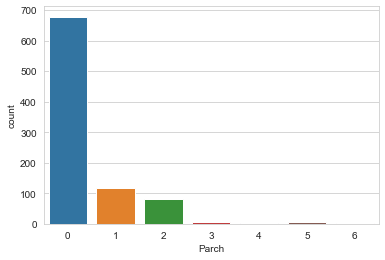

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',data=titanic)

## Step 2: Bivariate Analysis

To find the relation between 2 variables we need to perform bivariate analysis.

Different methods are used to tackle different combinations during analysis process-
1. Continuous & Continuous
2. Categorical & Categorical
3. Continuous & Categorical


###### Continuous & Continuous

SCATTER PLOT - FIND OUT THE RELATIONSHIP B/W 2 VARIABLES BUT DOES NOT INDICATE THE STRENGTH OF RELATIONSHIP AMONGST THEM.

HEAT MAP - CORRELATION (TO FIND THE STRENGTH OF THE RELATIONSHIP, WE USE CORRELATION AMONG NUMERICAL VALUES) 

(+1 POSITIVE LINEAR CORRELATION,-1 NEGATIVE LINEAR CORRELATION & 0 IS NO CORRELATION)

THE RELATIONSHIP CAN BE LINEAR OR NON LINEAR

###### Categorical & Categorical

STACKED BAR PLOT - THIS METHOD IS THE MOST VISUAL FORM OF 2 WAY TABLE

COUNT PLOT - SAME LIKE BAR PLOT

TWO WAY TABLE - TABLE COUNT & COUNT% BOTH ROW & COLUMN REPRESENT CATEGORY OF THEIR RESPECTIVE VARIABLES.

CHI-SQUARE TEST (TO TEST RELATIONSHIP BETWEEN VARIABLES)

If H0 (Null-Hypothesis) is fail to reject it means no relationship b/w variables and variables are independent. 

###### Continuous & Categorical
WHILE EXPLORING RELATIONSHIP B/W CATEGORICAL & CONTINUOUS VARIABLES, WE CAN USE VIOLIN/SWARM PLOT.

VIOLIN PLOT - LOOKS LIKE VIOLIN


#### SCATTER PLOT & CORRELATION FOR NUMERICAL VALUES

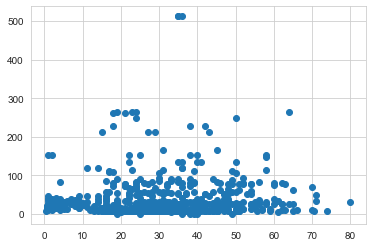

In [31]:
plt.scatter(x='Age',y='Fare',data=titanic)

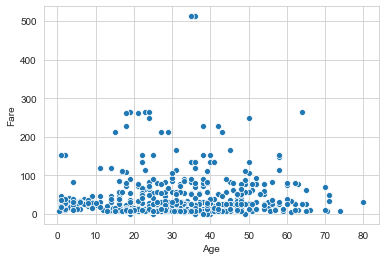

In [32]:
sns.scatterplot(x='Age',y='Fare',data=titanic)

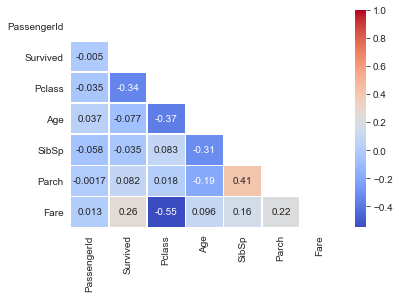

In [33]:
mask = np.zeros_like(titanic.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic.corr(), annot=True, linewidth=0.5, cmap='coolwarm', mask=mask)
#annot is used to show the values inside the matrix
#linewidth is used to give the space b/w the matrix
# mask is used to remove upper half

###### BAR PLOT (STACKED), COUNT PLOT & TWO WAY TABLE FOR Categorical & Categorical Variables
1.Pclass
2.Sex
3.Embarked
4.Cabin
5.SibSp
6.Parch

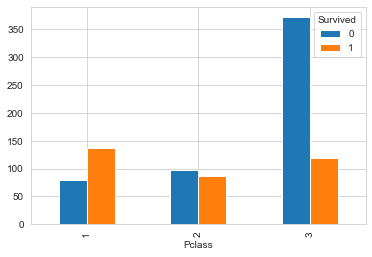

In [34]:
pd.crosstab(titanic['Pclass'],titanic['Survived']).plot(kind='bar')

The Chart confirms 1st class more likely survivied than other classes

The Chart also confirms 3rd class more likely dead than other classes

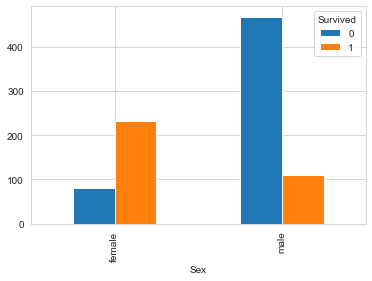

In [35]:
pd.crosstab(titanic['Sex'],titanic['Survived']).plot(kind='bar')

Through the above chart this is confirm that Women more likely survivied than Men

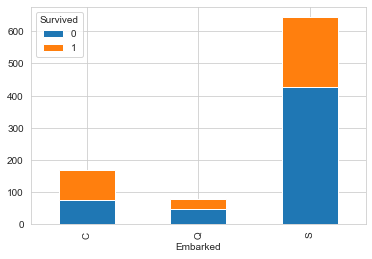

In [36]:
pd.crosstab(titanic['Embarked'],titanic['Survived']).plot(kind='bar',stacked=True)
# Stacked is used for stacked graph

The Chart confirms a person aboarded from C slightly more likely survived

The Chart also confirms a person aboarded from Q & S more likely dead

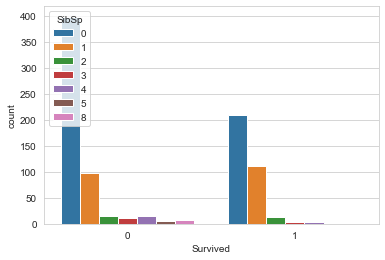

In [37]:
sns.countplot(hue='SibSp', x='Survived',data=titanic)
# hue is used for colour appearance parameter

The Chart confirms a person aboarded with siblings or spouse more likely survived

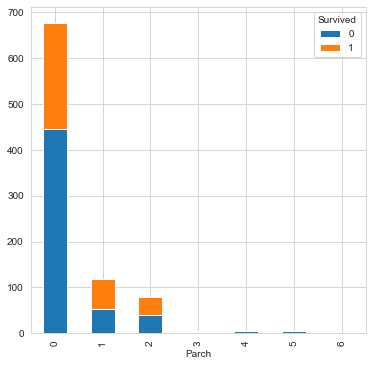

In [38]:
pd.crosstab(titanic['Parch'],titanic['Survived']).plot(kind='bar',stacked=True,figsize=(6,6))

* The Chart confirms a person aboarded with parents or children more likely survived
* The Chart confirms ** a person aboarded alone** more likely dead

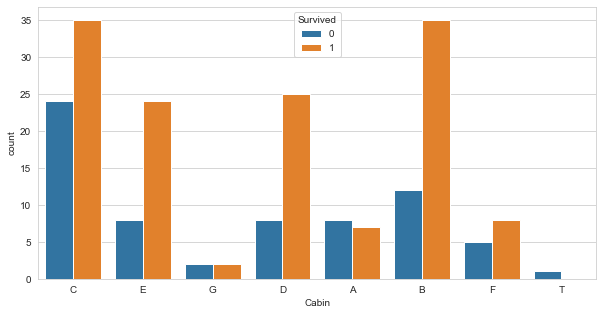

In [39]:
plt.figure (figsize=(10,5))
sns.countplot(x='Cabin',hue='Survived',data=titanic)

The chart confirms more passengers servived from Cabin B in comparison to other cabins

###### TWO WAY TABLE

In [40]:
titanic.groupby(['Sex','Pclass','Embarked','Survived'],axis=0).size()
# 0 for rows
# by default axis=0

Sex     Pclass  Embarked  Survived
female  1       C         0             1
                          1            42
                Q         1             1
                S         0             2
                          1            46
        2       C         1             7
                Q         1             2
                S         0             6
                          1            61
        3       C         0             8
                          1            15
                Q         0             9
                          1            24
                S         0            55
                          1            33
male    1       C         0            25
                          1            17
                Q         0             1
                S         0            51
                          1            28
        2       C         0             8
                          1             2
                Q         0             1

In [41]:
counts = titanic.groupby(['Pclass', 'Sex'])
counts.size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [42]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='summer_r')

## CHI SQUARE TEST

Null Hypothesis  : There is no relationship b/w 2 categorical values

Alternate Hypothesis: There is a relationship b/w the categorical values

In [43]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


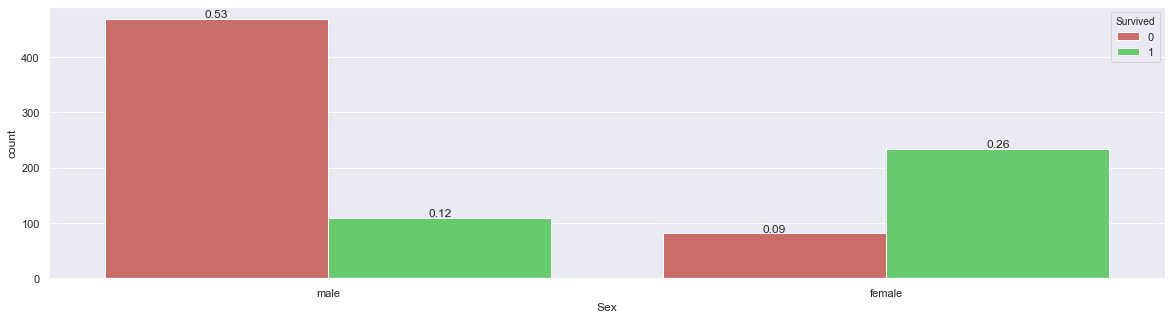

In [7]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
fig, ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x='Sex',hue='Survived',data=titanic)
print(ax)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/titanic.shape[0]),
           ha='center')

In [45]:
tit=pd.crosstab(index=titanic['Sex'],columns=titanic['Survived'])
tit

Survived,0,1
Sex,,
female,81,233
male,468,109


In [46]:
tit.iloc[0].values

array([ 81, 233], dtype=int64)

In [47]:
from scipy import stats
(chi2,p,dof,_)=stats.chi2_contingency([tit.iloc[0].values,tit.iloc[1].values])

In [48]:
print('chi2   :', chi2)
print('p-value  :', round(p, 5))
print('degree of freedom :',dof)

chi2   : 260.71702016732104
p-value  : 0.0
degree of freedom : 1


** chi2=sum((Observed-Expected)^2/Expected)

In [49]:
pd.crosstab(index=titanic['Sex'],columns=titanic['Survived'],margins=True)
# observed values

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


p-value is less than 0.05 so as per the standard practice we'll reject the null hypothesis, thus there is significant relationship b/w these variable - Sex & Survivved

### Continuous & Categorical

CATPLOT - It shows the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical Plots Like - POINT (FACTORPLOT), STRIP (CATPLOT), SWARM, BOX, VIOLIN, BOXEN, BAR, COUNT)

HEIGHT AND ASPECT FOR PLOT SIZE

WHILE EXPLORING RELATIONSHIP B/W CATEGORICAL & CONTINUOUS VARIABLES. WE CAN DRAW THE FOLLOWING PLOTS-

CATPLOT - 

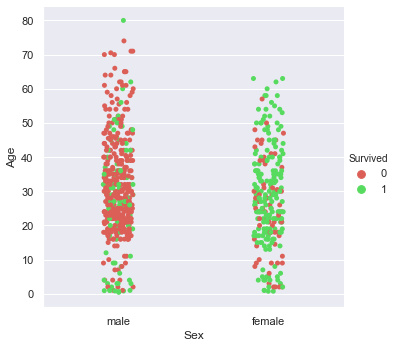

In [50]:
sns.catplot(x='Sex',y='Age',hue='Survived',data=titanic)

SWARM PLOT - GROUPED PLOT (ATLEAST ONE AXIS SHOULD BE NUMERIC)

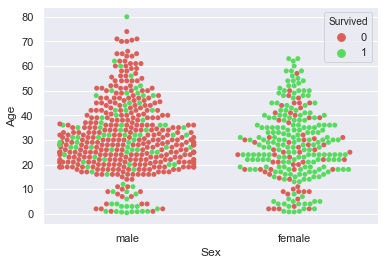

In [51]:
sns.swarmplot(x='Sex',y='Age',hue='Survived',data=titanic)

As per the above plot it shows that the age of most passengers are b/w 20-40.

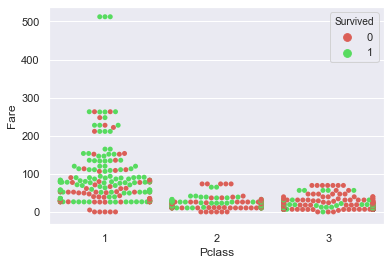

In [52]:
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=titanic)

The plot shows that the fare of most passengers are below 100.

VIOLIN PLOT - LOOKS LIKE VIOLIN (ATLEAST ONE AXIS SHOULD BE NUMERIC)

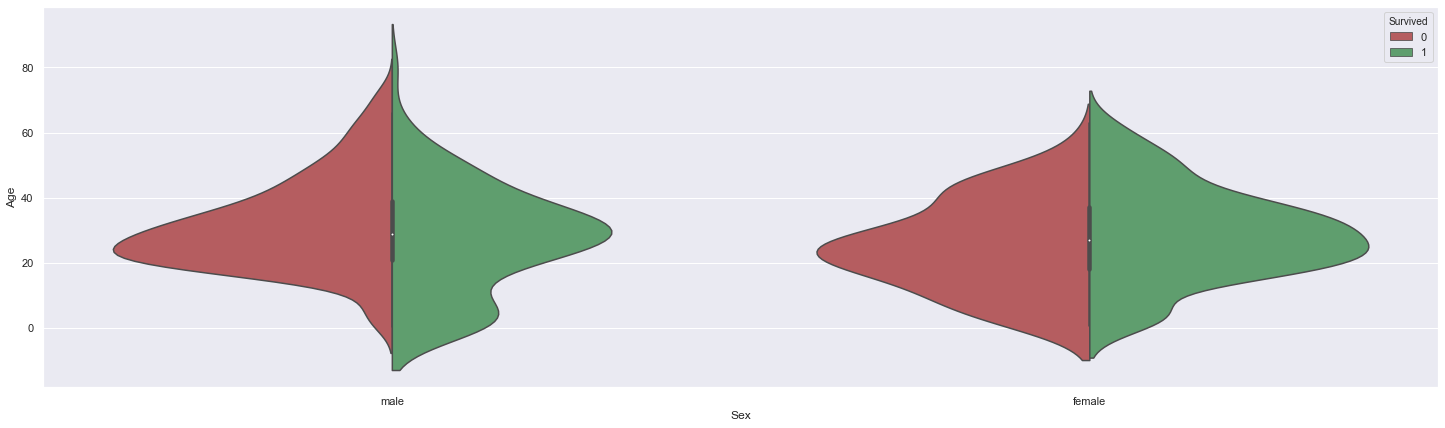

In [53]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic,split=True,palette={0:'r',1:'g'})
# palette may be coolwarm also

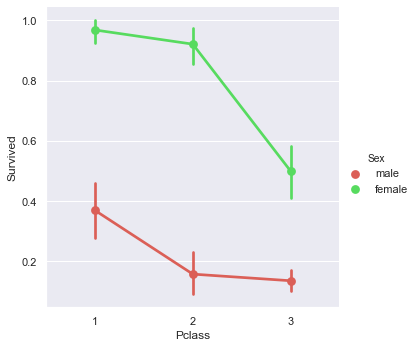

In [54]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=titanic)

## OTHER IMPORTANT PLOTS

RELPLOT - SHOWS RELATIONSHIP B/W  VARIABLES

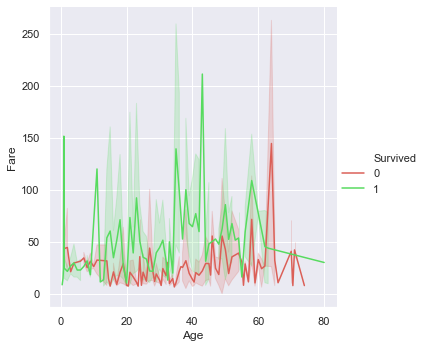

In [55]:
sns.relplot(x='Age',y='Fare',hue='Survived',kind='line',data=titanic)

REGPLOT - IT'S USED TO SHOW REGRESSION LINE

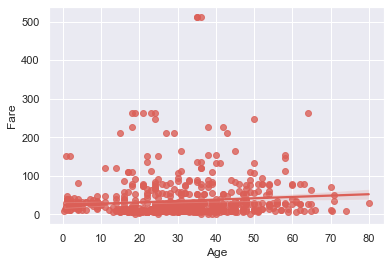

In [56]:
sns.regplot(x='Age',y='Fare',data=titanic)

JOINTPLOT - IT'S A COMBINATION OF HISTOGRAM & SCATTER PLOT

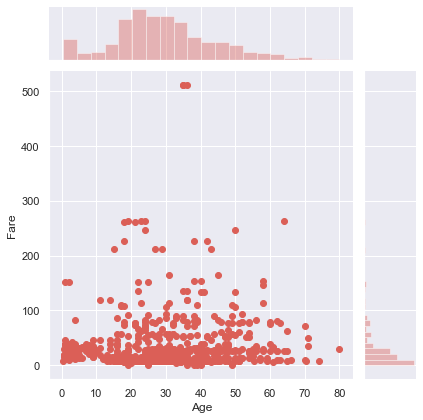

In [57]:
sns.jointplot(x='Age',y='Fare',data=titanic)

PAIRPLOT - FOR COMPLETE DATA SET

HUE = IN RESPECT OF ANY DEPENDENT VARIABLE 'Y'

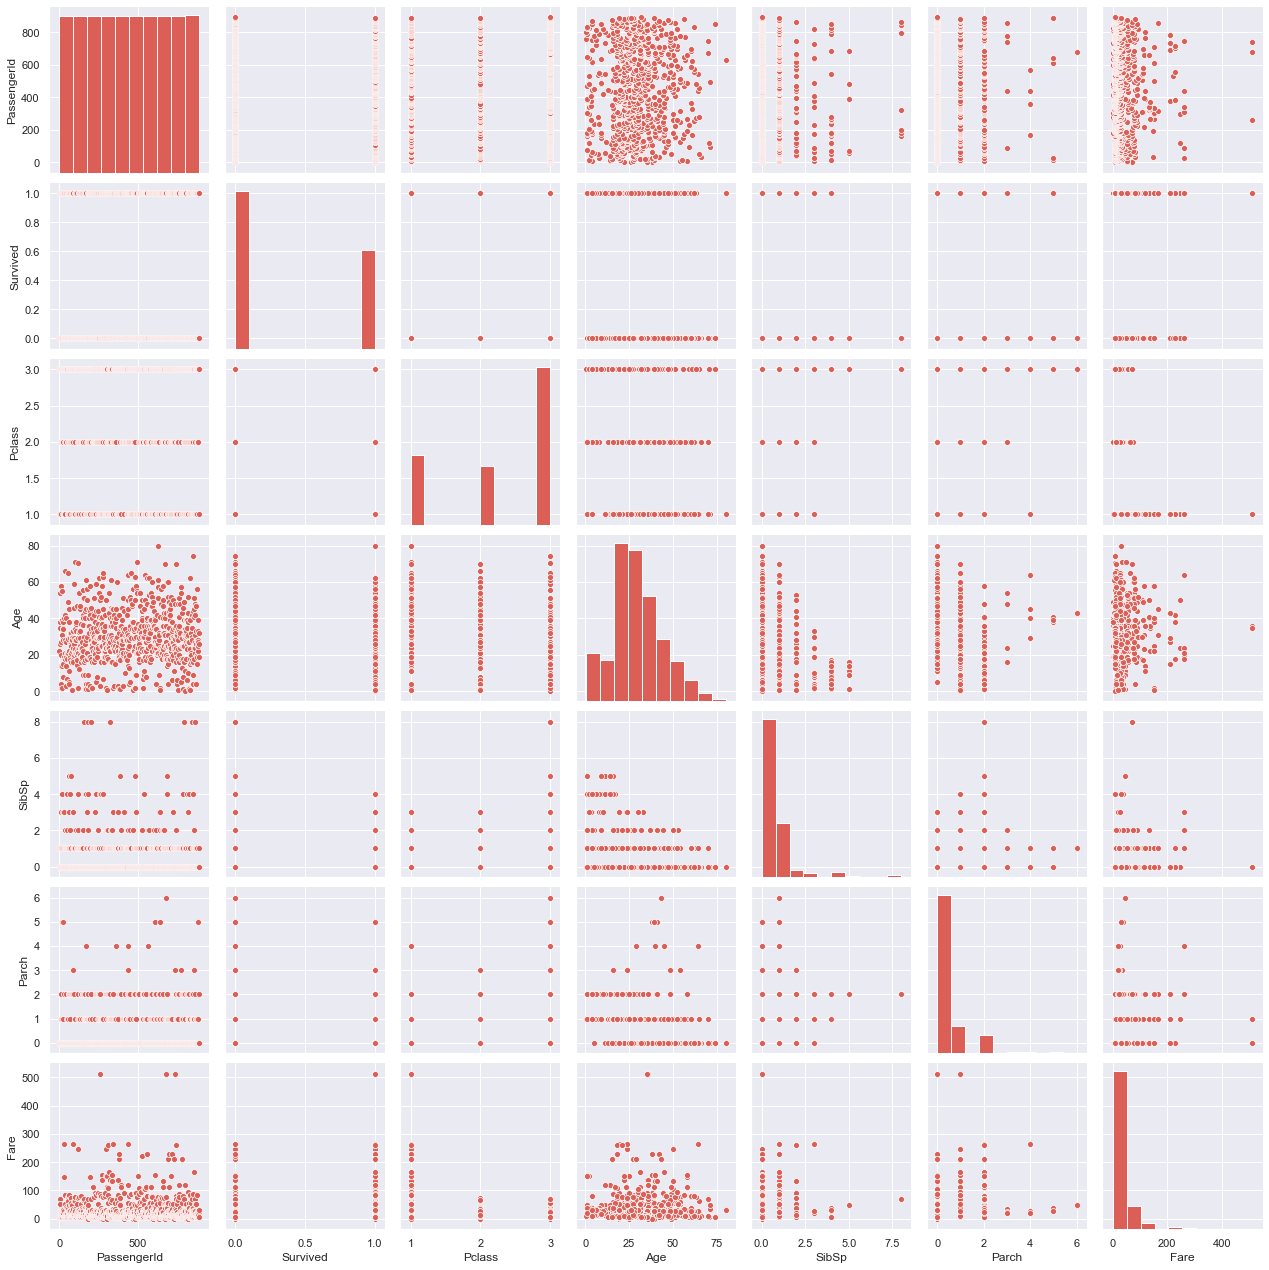

In [58]:
# Lets see the summary with respect to survived
#titanic[titanic['Survived']==1]
sns.pairplot(titanic)

## Step 4: Missing Values Treatment

1.As we have already noticed that there are missing values in dataset.

2.Missing Data will not make any impact on the result if its percentage is less than 1%, if missing data’s range within the range of 1-5% then it is somehow manageable; however in case of 5-15% complex techniques are used for handling the problems of missing data but if it exceeds from 15% then it will surely hinder the result achieved after applying data mining techniques

3.Handling such values is very important as this could lead to wrong results

4.Missing values could occur due to several reasons like,

a. – During data extraction i.e. while fetching the data required for the analysis

b. – During data collection itself there could be some fields for which the values may not have been collected.

5.But there are ways to handle these problems


In [59]:
# null values in the data set
titanic.isnull().values.any()

True

In [60]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
titanic.isnull().sum()*100 / len(titanic)
# Percentage of missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [62]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


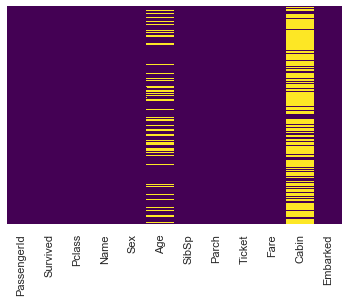

In [63]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### 1. Deletion: Deleting observations or variables.

If a particular variable is having more missing values than rest of the variables in the dataset, then we are better off without that variable unless it is a really important predictor that makes a lot of business sense.

Also, if in a huge dataset we have very minute number of observations missing, then we can delete the whole of observations altogether.


#### 2. Single Imputation: In single imputation, we use mean, median or mode.

If the variable is numeric then replace the missing values with either mean, median or mode.

If the variable is otherwise generally normally distributed (and in particular does not have any skewness), we would choose mean.

If the data skewed, median imputation is suggested.

If the variable is categorical then we could replace the missing values with the most frequent occurring value in that variable, i.e the mode.

We use the fillna function of pandas to replace na values with the value of our interest and inplace=True command makes the permanently changes the value in that dataframe

#### dataframe.['col_name'].fillna(0, inplace=True)

We can see that there are 3 missing variables-Age, Cabin & Embarked. we need to find a way to replace the missing values

Looking at the histogram of the variable Age (non missing value, we see that it is positively skewed. Hence we can impute missing values with Median of nonmissing data


#### FILLING OF MISSING VALUES IN AGE COLUMN

As we have already seen by the box plot that there are outliers in Age, so we'll fill the missing values by the median of Age - Sex wise because we know that there is major role of sex in survival

In [64]:
titanic.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [65]:
titanic['Age']=titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('median'))

#### FILLING OF MISSING VALUES IN EMBARKED COLUMN

In [66]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [67]:
titanic['Embarked'].mode()[0]
# or titanic['Embarked'].mode().iloc[0]

'S'

In [68]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

#### Constant:

This choice allows us to provide our own default value to fill in the gaps. This might be an integer or real number for numeric variables, or else a special marker or the choice of something other than the majority category for Categorical variables.

#### Closest fit:

The closest fit algorithm depends upon exchanging absent values with present value of the similar attribute of other likewise cases. Main notion is to find out from dataset likewise scenarios and select the likewise case to the case in discussion with missing attribute values. This method is more useful for a small dataset


In [69]:
titanic['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [70]:
titanic['Cabin'].describe()

count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object

In [71]:
titanic.groupby('Pclass')['Cabin'].describe()

,count,unique,top,freq
Pclass,,,,
1,176,6,C,59
2,16,3,F,8
3,12,3,F,5


In [18]:
titanic[titanic['Pclass']==1]['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
C22 C26        3
C52            2
C2             2
              ..
C54            1
B78            1
C62 C64        1
D28            1
E38            1
Name: Cabin, Length: 133, dtype: int64

In [19]:
titanic.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [23]:
abc=titanic['Fare']==0

In [26]:
abc.value_counts()

False    876
True      15
Name: Fare, dtype: int64

In [73]:
titanic[titanic['Pclass']==3]['Cabin'].isnull().sum()

479

In [45]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [44]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [47]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [74]:
P1=titanic[titanic['Pclass']==1]['Cabin'].mode()[0]
P2=titanic[titanic['Pclass']==2]['Cabin'].mode()[0]
P3=titanic[titanic['Pclass']==3]['Cabin'].mode()[0]
print(P1)
print(P2)
print(P3)

C
F
F


As we know by our previous observation that there is a major role of Pclass in passengers survival,so we'll replace the missing values with mode of each passenger class

In [75]:
def impute_Cabin(cols):
    Cabin=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Cabin):
        if Pclass==1:
            return 'C'
        elif Pclass==2:
            return 'F'
        else:
            return 'F'
    else:
        return Cabin

In [76]:
titanic['Cabin']=titanic[['Cabin','Pclass']].apply(impute_Cabin,axis=1)

In [77]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

It can be clearly seen that after applying the above mentioned techniques there is no missing value in dataset. Now we'll proceed for the next step of EDA i.e. outliers detection & treatment.

## Step 5: Outliers

#### What is an Outlier?

1.Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

2.Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavorable impacts of outliers in the data set:

a. It increases the error variance and reduces the power of statistical tests

b. If the outliers are non-randomly distributed, they can decrease normality

c. They can bias or influence estimates that may be of substantive interest

#### Causes of Outliers:

1.Data Entry Errors - Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.

2.Measurement Error - When the measurement instrument used turns out to be faulty.

3.Intentional Error - This is commonly found in self-reported measures that involves sensitive data.

4.Data Processing Error - When data is collected from different sources

5.Sampling Error - Data considered which is not part of the sample

6.Natural Outlier - When an outlier is not artificial (due to error), it is a natural outlier.

#### Outlier Detection

1.Outliers can be detected using boxplots and scatter plots


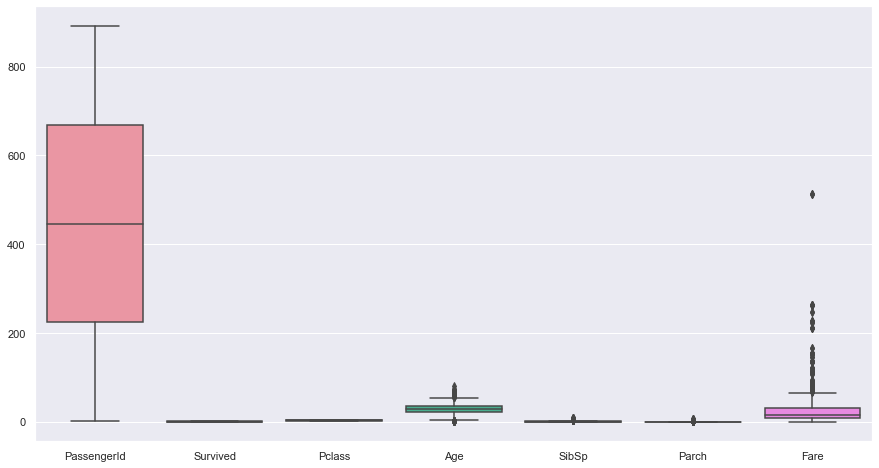

In [78]:
plt.figure(figsize=(15,8))
sns.boxplot(data=titanic)

#### Other than the plots, Outliers can also be detected by using certain thumb rules,

1.– Any value, which is below the range of Q1-1.5x IQR and above the range of Q3+1.5 x IQR where IQR = Q3-Q1

2.– Any value which out of range of 5th and 95th percentile can be considered as outlier

3.– Data points, three or more standard deviation away from mean are considered outlier


In [79]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [80]:
IQR = titanic['Fare'].quantile(0.75)-titanic['Fare'].quantile(0.25)
print(IQR)

23.0896


In [81]:
Upper_OutlierLimit = titanic['Fare'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = titanic['Fare'].quantile(0.25) - 1.5*IQR

print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

65.6344
-26.724


In [82]:
OutlierValues = titanic[(titanic['Fare']>=Upper_OutlierLimit) | (titanic['Fare']<=Lower_OutlierLimit)]

In [83]:
OutlierValues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,27.0,1,0,PC 17569,146.5208,B,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.5500,F,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,27.0,1,0,17453,89.1042,C,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,C,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,27.0,8,2,CA. 2343,69.5500,F,S


#### Handle Outliers

1.We could remove the outliers from the data if they are due to data entry or data processing errors

2.Based on business understanding you could also replace the outliers with mean or median

3.If there is a pattern of interest in the outliers then they could be handled separately. For example if the outliers are like in groups then treat both groups as two different groups and build individual model for both groups and then combine the output

4.Also the outliers can be capped with 5th or 95th percentile

We will be using capping method for imputation of the outlier in our data for variable Fare


In [84]:
titanic['Fare'][(titanic['Fare']>=Upper_OutlierLimit) | (titanic['Fare']<=Lower_OutlierLimit)]=titanic['Fare'].quantile(0.85)

There was still one outlier in the Fare when I was capping at 95th Quantile, so I reduced capping from 95th to 85th to remove the outliers. 

There are Upper and lower both kinds of outliers in Age, so we will treat them seperately. Capping for upper outliers (0.95) and for lower outliers (0.05)

In [85]:
IQR_Age = titanic['Age'].quantile(0.75)-titanic['Age'].quantile(0.25)
print(IQR_Age)
Upper_OutlierLimit_Age = titanic['Age'].quantile(0.75) + 1.5*IQR_Age
Lower_OutlierLimit_Age = titanic['Age'].quantile(0.25) - 1.5*IQR_Age
print(Upper_OutlierLimit_Age)
print(Lower_OutlierLimit_Age)
OutlierValues_Age = titanic[(titanic['Age']>=Upper_OutlierLimit_Age) | (titanic['Age']<=Lower_OutlierLimit_Age)]
titanic['Age'][(titanic['Age']>=Upper_OutlierLimit_Age)]=titanic['Age'].quantile(0.95)
titanic['Age'][(titanic['Age']<=Lower_OutlierLimit_Age)]=titanic['Age'].quantile(0.05)

13.0
54.5
2.5


In [86]:
IQR_SibSp = titanic['SibSp'].quantile(0.75)-titanic['SibSp'].quantile(0.25)
print(IQR_SibSp)
Upper_OutlierLimit_SibSp = titanic['SibSp'].quantile(0.75) + 1.5*IQR_SibSp
Lower_OutlierLimit_SibSp = titanic['SibSp'].quantile(0.25) - 1.5*IQR_SibSp
print(Upper_OutlierLimit_SibSp)
print(Lower_OutlierLimit_SibSp)
OutlierValues_SibSp = titanic[(titanic['SibSp']>=Upper_OutlierLimit_SibSp) | (titanic['SibSp']<=Lower_OutlierLimit_SibSp)]
titanic['SibSp'][(titanic['SibSp']>=Upper_OutlierLimit_SibSp)|(titanic['SibSp']<=Lower_OutlierLimit_SibSp)]=titanic['SibSp'].quantile(0.9)

1.0
2.5
-1.5


In [87]:
IQR_Parch = titanic['Parch'].quantile(0.75)-titanic['Parch'].quantile(0.25)
print(IQR_Parch)
Upper_OutlierLimit_Parch = titanic['Parch'].quantile(0.75) + 1.5*IQR_Parch
Lower_OutlierLimit_Parch = titanic['Parch'].quantile(0.25) - 1.5*IQR_Parch
print(Upper_OutlierLimit_Parch)
print(Lower_OutlierLimit_Parch)
OutlierValues_Parch = titanic[(titanic['Parch']>=Upper_OutlierLimit_Parch) | (titanic['Parch']<=Lower_OutlierLimit_Parch)]
titanic['Parch'][(titanic['Parch']>=Upper_OutlierLimit_Parch)|(titanic['Parch']<=Lower_OutlierLimit_Parch)]=titanic['Parch'].quantile(0.95)

0.0
0.0
0.0


#### BOX PLOTS AFTER CAPPING

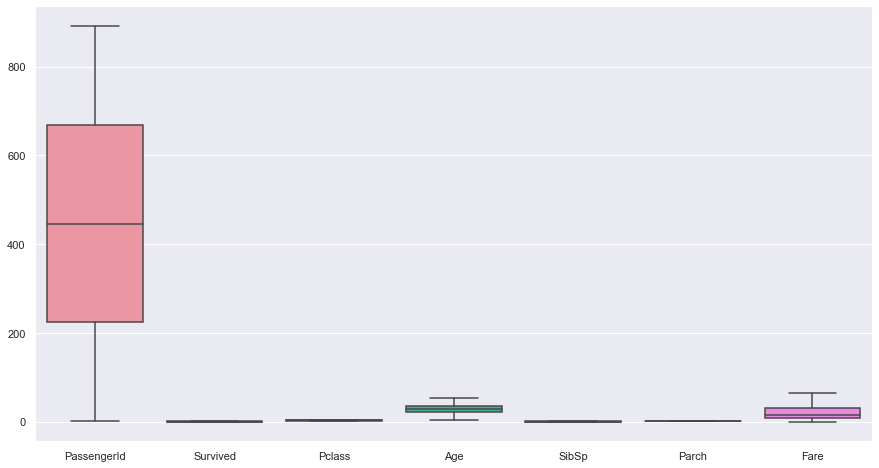

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(data=titanic)

As per the above graph it could be clearly seen that all the outliers are treated.

## Step 6: Feature Engineering - Variable and Dummy Variable Creation

1.Variable creation is a process to generate a new variables / features based on existing variable(s)

2.Dummy coding provides one way of using categorical predictor variables in various kinds of estimation models (see also effect coding), such as, linear regression. Dummy coding uses only ones and zeros to convey all of the necessary information on group membership.

3.Below is an example of variable creation-


In [89]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
obj=titanic.dtypes==np.object
print(obj)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [91]:
titanic.columns[obj]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Since,'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' are categorical variables, we need to convert them into dummy variables so that we will be able to use them as a predictor

We'll remove the features(name, passengerid & ticket) bcz these do not have impact on our ML project

In [92]:
del titanic['Name']

In [93]:
titanic.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [94]:
#dummydf = pd.DataFrame() 

#for i in titanic.columns[obj]:
    #dummy=pd.get_dummies(titanic[i], drop_first=True) 
    #"drop_first" drops the first category in order to avoid multicollinearity problem
    #prefix is used to add a certain prefix to all the dummy variables created for any particular categorial variable
        
    #dummydf=pd.concat([dummydf, dummy], axis=1) # Concatenating Columns
    #"pd.concat" combines all the dummy columns for all the categorical variables
    
#print(dummydf)

In [95]:
# TO CONVERT ALL OBJECTS OF DATA SET INTO DUMMIES
titanic_data=pd.get_dummies(titanic,drop_first=True)

In [96]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,0,3,22.0,1,2,7.2500,1,0,0,0,0,1,0,0,0,1
1,1,1,38.0,1,2,56.4958,0,0,1,0,0,0,0,0,0,0
2,1,3,26.0,0,2,7.9250,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,2,53.1000,0,0,1,0,0,0,0,0,0,1
4,0,3,35.0,0,2,8.0500,1,0,0,0,0,1,0,0,0,1


We'll also convert the Pclass into dummies

In [97]:
pclass=pd.get_dummies(titanic['Pclass'],drop_first=True,prefix='Pclass')

#### Work on FamilySize feature
•Family Size = Siblings+spouse+parents+childs+you

•Family Size = SibSp+Parch+1

Now we'll create the new feature "FamilySize" by using two features "SibSp" and "Parch"..

In [27]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

In [28]:
titanic['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [29]:
titanic['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

(0, 5.0)

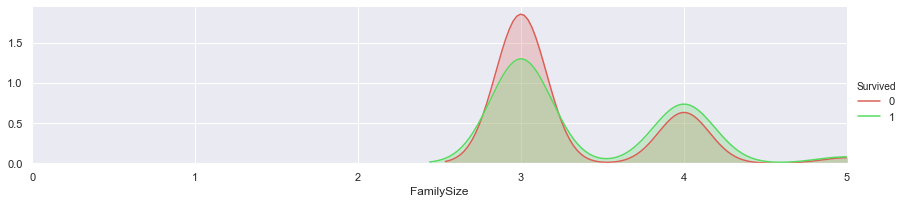

In [100]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, titanic['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [101]:
familysize=pd.get_dummies(titanic['FamilySize'],drop_first=True,prefix='FamilySize')

In [102]:
Titanic=pd.concat([titanic_data,pclass,familysize], axis=1)
Titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySize_4,FamilySize_5
0,0,3,22.0,1,2,7.2500,1,0,0,0,0,1,0,0,0,1,0,1,1,0
1,1,1,38.0,1,2,56.4958,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,3,26.0,0,2,7.9250,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,1,35.0,1,2,53.1000,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0,3,35.0,0,2,8.0500,1,0,0,0,0,1,0,0,0,1,0,1,0,0


We have already created new features by using SibSp, Parch & Pclass, so we'll drop all these. Now after deleting these features our datset is ready to apply ML techniques

In [103]:
Titanic.drop(['SibSp','Parch','Pclass'],axis=1,inplace=True)

# Building Machine Learning Models

Now we will train several Machine Learning models and compare their results.

In [104]:
Titanic.head()

,Survived,Age,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySize_4,FamilySize_5
0,0,22.0,7.2500,1,0,0,0,0,1,0,0,0,1,0,1,1,0
1,1,38.0,56.4958,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,35.0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0,35.0,8.0500,1,0,0,0,0,1,0,0,0,1,0,1,0,0


## STEP 1: DEFINE VARIABLES X AND Y

In [105]:
X=Titanic.iloc[:,1:].values
X.shape
# values convert into array
# vector is one dimensional

(891, 16)

In [106]:
Y=Titanic.iloc[:,0].values
Y.shape

(891,)

## STEP 2: SPLIT THE MODEL

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

Test size is generally considered b/w 20 to 33%


Test size is directly proportional to accuracy

random_state=0, so that the result may not change each time we run the code.

# FINDING THE BEST MODEL-

In [109]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [145]:
#Random Forest:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [146]:
# Logistic Regression:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [148]:
# KNN (K Nearest Neighbor)
knn = KNeighborsClassifier() 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [150]:
# Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [151]:
# Support Vector Machine:
svm = SVC(random_state=0)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
acc_svm = round(svm.score(X_train, Y_train) * 100, 2)

In [115]:
# Grid Search (GS):
param_grid={'C':[0.1,1.0,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svm,param_grid)
grid.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
grid.score(X_train, Y_train)
acc_grid = round(grid.score(X_train, Y_train) * 100, 2)

In [152]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0) 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [153]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Grid Search', 
              'Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_grid, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.59,Random Forest
97.59,Decision Tree
83.63,Grid Search
81.54,Logistic Regression
79.61,KNN
72.07,Naive Bayes
66.29,Support Vector Machines


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [156]:
# K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, Y_train,cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76190476 0.79365079 0.80952381 0.85483871 0.79032258 0.80645161
 0.70967742 0.77419355 0.82258065 0.87096774]
Mean: 0.799411162314388
Standard Deviation: 0.04369416725436315


This looks much more realistic than before. Our model has an average accuracy of 79.94 % with a standard deviation of 4.3 %. 
The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 4.36 %.

In [157]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('RF', RandomForestClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=0)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.792985 (0.039335)
RF: 0.799411 (0.043694)
KNN: 0.717691 (0.065424)
DT: 0.767281 (0.033626)
NB: 0.656503 (0.103992)
SVM: 0.661418 (0.050942)


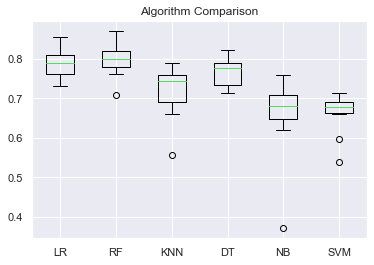

In [159]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

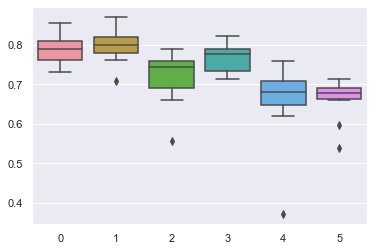

In [161]:
sns.boxplot(data=results)

# Random Forest

In [119]:
Y_prediction

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

## STEP 5: EVALUATE THE MODEL

In [120]:
from sklearn import metrics

In [121]:
metrics.confusion_matrix(Y_test,Y_prediction)

array([[146,  22],
       [ 28,  72]], dtype=int64)

In [122]:
pd.crosstab(Y_test,Y_prediction,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,146,22
1,28,72


The first row is about the not-survived-predictions: 148 passengers were correctly classified as not survived (called true negatives) and 20 were wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 29 passengers were wrongly classified as survived (false negatives) and 71 were correctly classified as survived (true positives).

In [123]:
metrics.accuracy_score(Y_test,Y_prediction)

0.8134328358208955

In [124]:
metrics.precision_score(Y_test,Y_prediction)

0.7659574468085106

In [125]:
metrics.recall_score(Y_test,Y_prediction)

0.72

Our model predicts 78% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 71 % of the people who actually survived.

In [126]:
metrics.f1_score(Y_test,Y_prediction)

0.7422680412371133

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

There we have it, a 74 % F-score. The score is not that high, because we have a recall of 71%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

In [127]:
cf=metrics.classification_report(Y_test,Y_prediction)
print(cf)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       168
           1       0.77      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [128]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score

In [129]:
y_prob = random_forest.predict_proba(X_test)

In [130]:
y_prob = y_prob[:,1]

(array([174.,  94.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

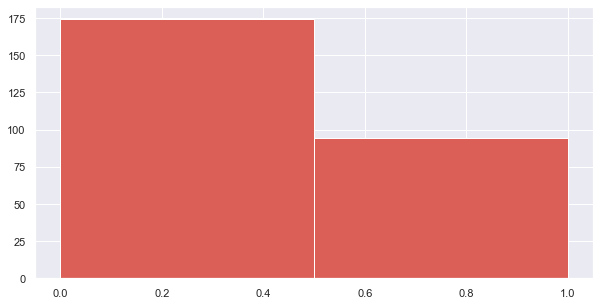

In [158]:
plt.figure(figsize=(10,5))
plt.hist(y_prob,bins=2)

In [132]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.8832738095238095

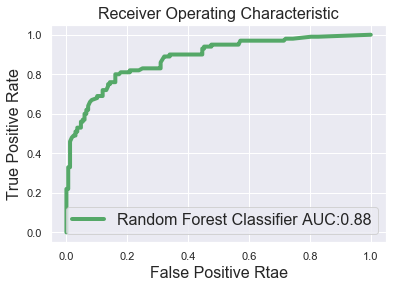

In [133]:
label='Random Forest Classifier AUC:' + '{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='g', linewidth=4,label=label)
plt.xlabel('False Positive Rtae',fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic',fontsize=16)
plt.legend(loc=4,fontsize=16)

# Precision Recall Curve

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part.

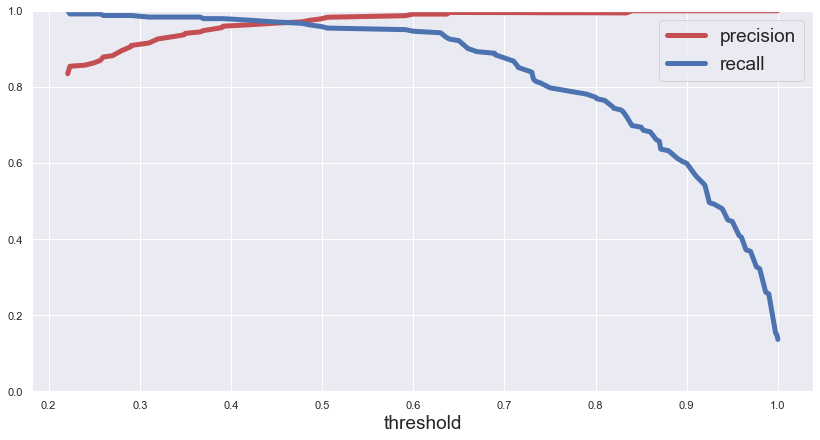

In [134]:
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

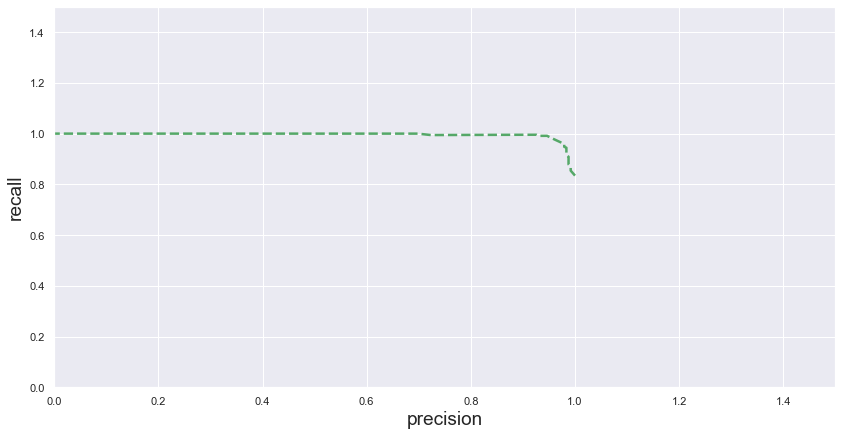

In [135]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

# ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

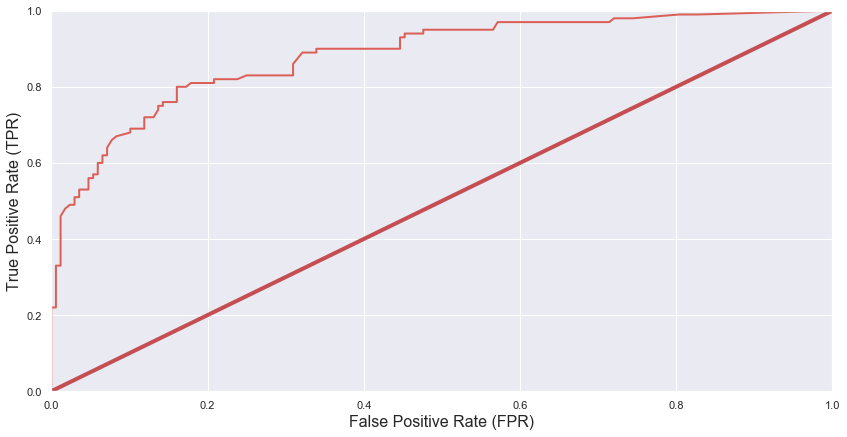

In [136]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [137]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9970770699117155


# Summary

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training 7 different machine learning models, picked one of them (random forest) and applied cross validation on it.